#### The code to generate Fig. 1 of arXiv: 1809.01146

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import interpolate

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_dir = "../logPkRatio/"
Tb_AGN          = pd.read_csv(data_dir+"logPkRatio_owls_AGN.dat"         ,sep='\s+')
Tb_DBLIMFV1618  = pd.read_csv(data_dir+"logPkRatio_owls_DBLIMFV1618.dat" ,sep='\s+')
Tb_NOSN         = pd.read_csv(data_dir+"logPkRatio_owls_NOSN.dat"        ,sep='\s+')
Tb_NOSN_NOZCOOL = pd.read_csv(data_dir+"logPkRatio_owls_NOSN_NOZCOOL.dat",sep='\s+')
Tb_NOZCOOL      = pd.read_csv(data_dir+"logPkRatio_owls_NOZCOOL.dat"     ,sep='\s+')
Tb_REF          = pd.read_csv(data_dir+"logPkRatio_owls_REF.dat"         ,sep='\s+')
Tb_WDENS        = pd.read_csv(data_dir+"logPkRatio_owls_WDENS.dat"       ,sep='\s+')
Tb_WML1V848     = pd.read_csv(data_dir+"logPkRatio_owls_WML1V848.dat"    ,sep='\s+')
Tb_WML4         = pd.read_csv(data_dir+"logPkRatio_owls_WML4.dat"        ,sep='\s+')
Tb_ill1         = pd.read_csv(data_dir+"logPkRatio_ill1.dat"             ,sep='\s+')
Tb_mb2          = pd.read_csv(data_dir+"logPkRatio_mb2.dat"              ,sep='\s+')
Tb_eagle        = pd.read_csv(data_dir+"logPkRatio_eagle.dat"            ,sep='\s+')
Tb_HzAGN        = pd.read_csv(data_dir+"logPkRatio_HzAGN.dat"            ,sep='\s+')
Tb_TNG100       = pd.read_csv(data_dir+"logPkRatio_TNG100.dat"           ,sep='\s+')

In [3]:
Tb_mb2

,logk,z350,z325,z280,z245,z210,z200,z180,z170,z160,...,z110,z100,z080,z070,z060,z040,z035,z020,z00625,z000
0,-3.301030,-6.165910e-25,-2.055303e-25,-8.221214e-25,-4.110607e-25,-8.221214e-25,0.000000e+00,-8.221214e-25,4.110607e-25,-4.110607e-25,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.644243e-24,-8.221214e-25,-1.644243e-24,0.000000e+00,0.000000e+00
1,-3.167794,7.776460e-09,8.391665e-09,1.072656e-08,1.250474e-08,1.482464e-08,1.522197e-08,1.642773e-08,1.700193e-08,1.782008e-08,...,2.001823e-08,2.057552e-08,2.161024e-08,2.247440e-08,2.346539e-08,2.785515e-08,3.069875e-08,4.914103e-08,7.199854e-08,8.057137e-08
2,-3.034559,3.203245e-09,3.456657e-09,4.418435e-09,5.150897e-09,6.106501e-09,6.270167e-09,6.766836e-09,7.003360e-09,7.340369e-09,...,8.245821e-09,8.475376e-09,8.901593e-09,9.257554e-09,9.665758e-09,1.147397e-08,1.264529e-08,2.024195e-08,2.965731e-08,3.318860e-08
3,-2.901323,-1.371965e-08,-1.480502e-08,-1.892436e-08,-2.206153e-08,-2.615443e-08,-2.685542e-08,-2.898268e-08,-2.999572e-08,-3.143914e-08,...,-3.531724e-08,-3.630043e-08,-3.812594e-08,-3.965054e-08,-4.139889e-08,-4.914354e-08,-5.416038e-08,-8.669722e-08,-1.270237e-07,-1.421483e-07
4,-2.768087,-2.455476e-08,-2.649732e-08,-3.386991e-08,-3.948467e-08,-4.680994e-08,-4.806453e-08,-5.187180e-08,-5.368489e-08,-5.626826e-08,...,-6.320909e-08,-6.496876e-08,-6.823596e-08,-7.096462e-08,-7.409374e-08,-8.795474e-08,-9.693363e-08,-1.551665e-07,-2.273408e-07,-2.544102e-07
5,-2.634851,4.358017e-08,4.702785e-08,6.011284e-08,7.007800e-08,8.307900e-08,8.530566e-08,9.206286e-08,9.528077e-08,9.986578e-08,...,1.121845e-07,1.153076e-07,1.211062e-07,1.259491e-07,1.315027e-07,1.561034e-07,1.720393e-07,2.753919e-07,4.034880e-07,4.515311e-07
6,-2.501616,-6.031084e-08,-6.508211e-08,-8.319050e-08,-9.698134e-08,-1.149735e-07,-1.180550e-07,-1.274063e-07,-1.318596e-07,-1.382048e-07,...,-1.552527e-07,-1.595748e-07,-1.675996e-07,-1.743017e-07,-1.819873e-07,-2.160324e-07,-2.380862e-07,-3.811164e-07,-5.583893e-07,-6.248765e-07
7,-2.368380,-8.333987e-07,-8.993298e-07,-1.149559e-06,-1.340126e-06,-1.588748e-06,-1.631330e-06,-1.760550e-06,-1.822087e-06,-1.909768e-06,...,-2.145342e-06,-2.205066e-06,-2.315957e-06,-2.408568e-06,-2.514772e-06,-2.985220e-06,-3.289967e-06,-5.266415e-06,-7.716041e-06,-8.634786e-06
8,-2.235144,-2.288068e-06,-2.469080e-06,-3.156074e-06,-3.679270e-06,-4.361855e-06,-4.478761e-06,-4.833531e-06,-5.002479e-06,-5.243203e-06,...,-5.889965e-06,-6.053935e-06,-6.358380e-06,-6.612643e-06,-6.904221e-06,-8.195821e-06,-9.032493e-06,-1.445876e-05,-2.118413e-05,-2.370651e-05
9,-2.101908,-4.424319e-06,-4.774332e-06,-6.102738e-06,-7.114415e-06,-8.434294e-06,-8.660348e-06,-9.346348e-06,-9.673034e-06,-1.013851e-05,...,-1.138912e-05,-1.170618e-05,-1.229487e-05,-1.278652e-05,-1.335034e-05,-1.584783e-05,-1.746567e-05,-2.795816e-05,-4.096265e-05,-4.584006e-05


In [4]:
blue1    ="#0300DB" #"#001CAA"
blue9   = "#214F94"

green1   ="forestgreen"#"g" #"#297F0F"
red1     ="#E00000" #"#C10019"
red9    = "#CC0204"#"#DB0200"

orange1  ="darkorange" #"#FA7921"
orange9 = "#FFA903"  

purple1  ="purple" #"#683885"
brown1   ="sienna"
gray1    ="grey" #"#626262"
gray9   = "#858278"

olive1   ="olive"

black = "#000000"

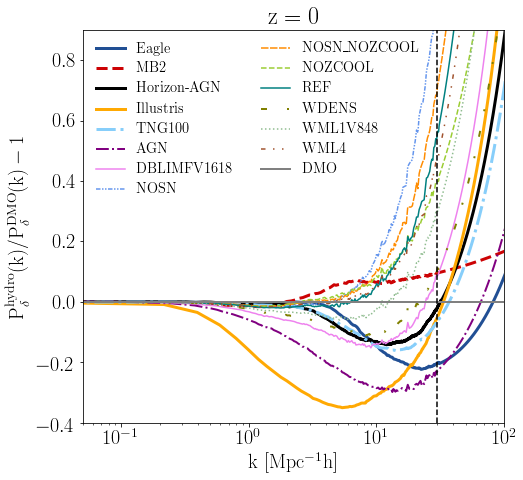

In [5]:
title=r'$\mathrm{z=0}$'
colz = "z000"

fig = plt.figure(figsize=(7.2,6.5))
plt.rc('text', usetex=True)      
plt.rc('font',size=20)

ax1=fig.add_axes([0.158 ,0.11,0.813,0.84])

ax1.plot(10**Tb_eagle       ['logk'],10**Tb_eagle       [colz]-1 ,label=r'$\mathrm{Eagle}$'        ,color=blue9 ,lw=3)
ax1.plot(10**Tb_mb2         ['logk'],10**Tb_mb2         [colz]-1 ,label=r'$\mathrm{MB2}$'          ,color=red9  ,lw=3, ls="--")
ax1.plot(10**Tb_HzAGN       ['logk'],10**Tb_HzAGN       ["logPk000"]-1 ,label=r'$\mathrm{Horizon\mbox{-}AGN}$',color=black,lw=3)
ax1.plot(10**Tb_ill1        ['logk'],10**Tb_ill1        [colz]-1 ,label=r'$\mathrm{Illustris}$'    ,color=orange9,lw=3)
ax1.plot(10**Tb_TNG100      ['logk'],10**Tb_TNG100      [colz]-1 ,label=r'$\mathrm{TNG100}$'       ,color="lightskyblue",lw=3,ls='-.')
ax1.plot(10**Tb_AGN         ['logk'],10**Tb_AGN         [colz]-1 ,label=r'$\mathrm{AGN}$'          ,color=purple1  ,ls="-.",lw=2)
ax1.plot(10**Tb_DBLIMFV1618 ['logk'],10**Tb_DBLIMFV1618 [colz]-1 ,label=r'$\mathrm{DBLIMFV1618}$'  ,color="violet")
ax1.plot(10**Tb_NOSN        ['logk'],10**Tb_NOSN        [colz]-1 ,label=r'$\mathrm{NOSN}$'         ,color='cornflowerblue',ls=(0, (3, 1, 1, 1, 1, 1)))
ax1.plot(10**Tb_NOSN_NOZCOOL['logk'],10**Tb_NOSN_NOZCOOL[colz]-1 ,label=r'$\mathrm{NOSN\_NOZCOOL}$',color='darkorange' ,ls=(0, (5, 1)))
ax1.plot(10**Tb_NOZCOOL     ['logk'],10**Tb_NOZCOOL     [colz]-1 ,label=r'$\mathrm{NOZCOOL}$'      ,color='yellowgreen',ls= '--')
ax1.plot(10**Tb_REF         ['logk'],10**Tb_REF         [colz]-1 ,label=r'$\mathrm{REF}$'          ,color='teal' ,ls="-")
ax1.plot(10**Tb_WDENS       ['logk'],10**Tb_WDENS       [colz]-1 ,label=r'$\mathrm{WDENS}$'        ,color='olive',ls=(0, (3, 10, 1, 10)),lw=2)
ax1.plot(10**Tb_WML1V848    ['logk'],10**Tb_WML1V848    [colz]-1 ,label=r'$\mathrm{WML1V848}$'     ,color='darkseagreen',ls=":")
ax1.plot(10**Tb_WML4        ['logk'],10**Tb_WML4        [colz]-1 ,label=r'$\mathrm{WML4}$'         ,color=brown1,ls=(0, (3, 5, 1, 5, 1, 5)))

ax1.axhline(y=0, color='gray', linestyle='-',label=r'$\mathrm{DMO}$',lw=2)
ax1.axvline(x=30, color='k', linestyle='--')


ax1.set_xscale('log')
ax1.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
ax1.set_ylabel(r'$\mathrm{P_{\delta}^{hydro}(k)/P_{\delta}^{DMO}(k)-1}$')
ax1.set_title(title)

ax1.set_xlim(0.05,100)
 
#ax1.legend(loc=(0.02,0.02),prop={'size': 17},ncol=2)
ax1.legend(loc="best",prop={'size': 14.5},ncol=2,frameon=False)
ax1.set_ylim(-0.4,0.9)

fig.savefig("aaa.pdf")